In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, pymc as mc
import dismod_mr

In [4]:
model = dismod_mr.data.load('amd_sim_data')
model.keep(areas=['all'], sexes=['female', 'total'])

kept 769 rows of data


In [5]:
summary = model.input_data.groupby('data_type')['value'].describe()
np.round(summary,3).sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
data_type,,,,,,,,
p,769.0,0.023,0.047,0.0,0.002,0.006,0.021,0.385


In [6]:
groups = model.get_data('p').groupby('area')
print(np.round_(groups['value'].describe(),3).sort_values('50%', ascending=False))

      count   mean    std    min    25%    50%    75%    max
area                                                        
DNK    24.0  0.096  0.099  0.009  0.032  0.073  0.112  0.385
DZA     1.0  0.051    NaN  0.051  0.051  0.051  0.051  0.051
TWN    22.0  0.062  0.061  0.006  0.010  0.036  0.128  0.167
FIN     3.0  0.042  0.018  0.030  0.031  0.033  0.048  0.062
ISL    66.0  0.057  0.080  0.002  0.007  0.031  0.065  0.346
GBR     6.0  0.030  0.012  0.020  0.021  0.025  0.039  0.044
NOR    30.0  0.029  0.027  0.004  0.006  0.024  0.042  0.087
ITA     8.0  0.026  0.013  0.015  0.015  0.022  0.032  0.044
ESP     8.0  0.021  0.007  0.014  0.017  0.020  0.023  0.032
FRA     8.0  0.033  0.039  0.002  0.013  0.017  0.037  0.094
GRC    72.0  0.021  0.025  0.002  0.006  0.012  0.028  0.111
KEN     6.0  0.010  0.004  0.005  0.006  0.011  0.013  0.014
IND     6.0  0.008  0.004  0.003  0.004  0.009  0.012  0.012
BRB    16.0  0.009  0.007  0.000  0.005  0.007  0.011  0.023
AUS    56.0  0.036  0.06

In [7]:
countries = ['NLD', 'GRC']
c = {}
for i, c_i in enumerate(countries):
    c[i] = groups.get_group(c_i)

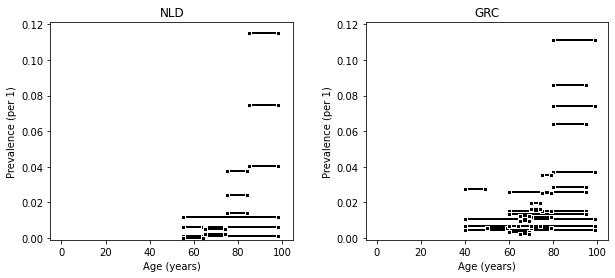

In [8]:
ax = None
plt.figure(figsize=(10,4))
for i, c_i in enumerate(countries):
    ax = plt.subplot(1,2,1+i, sharey=ax, sharex=ax)
    dismod_mr.plot.data_bars(c[i])
    plt.xlabel('Age (years)')
    plt.ylabel('Prevalence (per 1)')
    plt.title(c_i)
plt.axis(ymin=-.001, xmin=-5, xmax=105)
plt.subplots_adjust(wspace=.3)

In [9]:
# remove fixed effects for this example, I will return to them below
model.input_data = model.input_data.filter(regex='(?!x_)')

In [12]:
model.vars += dismod_mr.model.asr(model, 'p')
# %time dismod_mr.fit.asr(model, 'p',verbose=True)

len(data) > 0
include_covariates
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: USA
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: AUS
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: NLD
area: FIN
area: FIN
area: FIN
area: BRB


NetworkXNoPath: No path between all and BRB.

['all', 'super-region_0', 'asia_pacific_high_income', 'JPN']
[0.19980122 0.20273573 0.20567025 0.20860476 0.21153928]


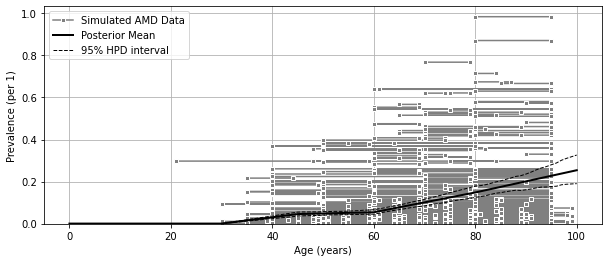

In [109]:
# plot age-specific prevalence estimates over data bars
plt.figure(figsize=(10,4))

dismod_mr.plot.data_bars(model.get_data('p'), color='grey', label='Simulated AMD Data')
pred = dismod_mr.model.predict_for(model=model, 
                                   parameters=model.parameters['p'], 
                                   root_area='all', root_sex='female', root_year= 2005,
                                   area     ='JPN', sex=     'female', year=      2005,
                                   population_weighted=1.,
                                   vars=model.vars['p'], 
                                   lower=0., upper=1.)    # TODO: simplify this method!

hpd = mc.utils.hpd(pred, .05)
# Highest Posterior Density

plt.plot(np.arange(101), pred.mean(axis=0), 'k-', linewidth=2, label='Posterior Mean')
plt.plot(np.arange(101), hpd[0,:], 'k--', linewidth=1, label='95% HPD interval')
plt.plot(np.arange(101), hpd[1,:], 'k--', linewidth=1)

plt.xlabel('Age (years)')
plt.ylabel('Prevalence (per 1)')
plt.grid()
plt.legend(loc='upper left')

plt.axis(ymin=-.001, xmin=-5, xmax=105);

print(pred[500,-5:])

In [101]:
p_only = model  # store results for future comparison

This estimate shows the nonlinear increase in prevalence as a function of age, where the slope of the
curve increases at age 60.  A nonlinear estimate like this is possible thanks to DisMod-MR's piecewise linear
spline model.

The age-standardizing model for heterogeneous age groups is also important for
such settings; a naive approach, such as using the age interval midpoint, would result in under-estimating
the prevalence for age groups that include both individuals older and younger than 60.


The exact age where the slope of the curve changes is _not_ entirely data driven in this example.  The knots
in the piecewise linear spline model were chosen a priori, on the following grid:

In [ ]:
model.parameters['p']['parameter_age_mesh']

[0, 30, 45, 60, 80, 100]

A sparse grid allows faster computation, but a dense grid allows more expressive age pattens.  Choosing
the proper balance is one challenge of a DisMod-MR analysis.  This is especially true for sparse,
noisy data, where too many knots allow the model to follow noisy idiosyncrasies of the data.  DisMod-MR
allows for penalized spline regression to help with this choice.

The country-level random effects in this model capture country-to-country variation in PD prevalence.
This variation is not visible in the graphic above, which shows the regional aggregation of country-level
estimates (using a population weighted average that takes uncertainty into account).

The country-level random effects take the form of intercept shifts in log-prevalence space, with values
showing in the following:

In [65]:
df = pd.DataFrame(index=[alpha_i.__name__ for alpha_i in model.vars['p']['alpha']],
                      columns=['mean', 'lb', 'ub'])
for alpha_i in model.vars['p']['alpha']:
    trace = alpha_i.trace()
    hpd = mc.utils.hpd(trace, .05)
    df.loc[alpha_i.__name__] = (np.mean(trace), hpd[0], hpd[1])

In [ ]:
print(np.round(df.astype(float),3).sort_values('mean', ascending=False))

              mean     lb     ub
alpha_p_NOR  0.869  0.641  1.155
alpha_p_DEU  0.811  0.516  1.057
alpha_p_ITA  0.705  0.419  1.056
alpha_p_FRA  0.696  0.410  1.005
alpha_p_ISL  0.444  0.221  0.724
alpha_p_GBR -0.095 -0.506  0.279
alpha_p_FIN -0.153 -0.515  0.416
alpha_p_PRT -0.251 -0.517  0.098
alpha_p_ESP -0.280 -0.635  0.139
alpha_p_NLD -0.558 -0.885 -0.247
alpha_p_IRL -0.829 -1.193 -0.459
alpha_p_GRC -1.014 -1.284 -0.674


The fourth feature of the model which I want to draw attention to here is the negative binomial model of data,
which deals with measurements of zero prevalence in a principled way.  Prevalence studies are reporting transformations
of count data, and count data can be zero.  In the case of prevalence of PD in 30- to 40-year-olds, it often _will_ be zero.

In [ ]:
model.get_data('p').sort_values('age_start').filter(['age_start', 'age_end', 'area', 'value']).head(15)

,age_start,age_end,area,value
4413,35,74,DEU,0.018842
4420,35,74,DEU,0.043658
4427,35,74,DEU,0.000919
4434,35,74,DEU,0.000919
4441,35,74,DEU,0.001838
4448,35,74,DEU,0.045496
4455,35,74,DEU,0.024816
4462,35,74,DEU,0.018842
4469,35,74,DEU,0.043658
4476,35,74,DEU,0.000919


The negative binomial model has an appropriately skewed distribution, where prevalence measurements 
of zero are possible, but measurements of less than zero are not possible.  To demonstrate how this
functions, the next figure shows the "posterior predictive distribution" for the measurements above,
i.e. sample values that the model predicts would be found of the studies were conducted again under
the same conditions.

In [68]:
pred = model.vars['p']['p_pred'].trace()
obs = np.array(model.vars['p']['p_obs'].value)
ess = np.array(model.vars['p']['p_obs'].parents['n'])

Text(0.5, 1.0, 'Posterior Predictive distribution')

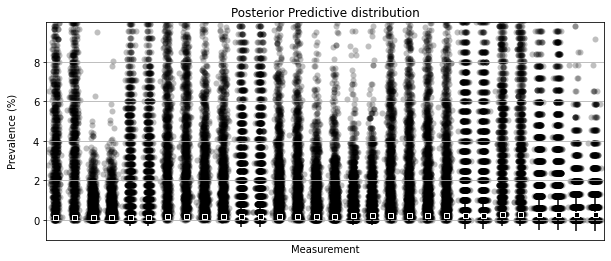

In [ ]:
plt.figure(figsize=(10,4))

sorted_indices = obs.argsort().argsort()
jitter = mc.rnormal(0, .1**-2, len(pred))

for i,s_i in enumerate(sorted_indices):
    plt.plot(s_i+jitter, pred[:, i], 'ko', mew=0, alpha=.25, zorder=-99)

plt.errorbar(sorted_indices, obs, yerr=1.96*np.sqrt(obs*(1-obs)/ess), fmt='ks', mew=1, mec='white', ms=5)

plt.xticks([])
plt.xlabel('Measurement')
plt.ylabel('Prevalence (%)\n', ha='center')
plt.yticks([0, .02, .04, .06, .08], [0, 2, 4, 6, 8])
plt.axis([25.5,55.5,-.01,.1])
plt.grid()
plt.title('Posterior Predictive distribution')

Additional features of DisMod-MR
--------------------------------

Four additional features of DisMod-MR that are important for many settings are:

* informative priors
* fixed effects to cross-walk between different studies
* fixed effects to predict out of sample
* fixed effects to explain the level of variation

Informative priors are useful for modeling disease with less data available than PD, for example to include
information that prevalence is zero for youngest ages, or than prevalence must be increasing as a function of
age between certain ages.

The informative priors are also key to the "empirical Bayes" approach to modeling age-specific differences between
difference GBD regions.  In this setting, a model using all the world's data is used to produce estimates for each region,
and these estimates are used as priors in region-specific models together with the data relevant to that region only.

"Cross-walk" fixed effects can correct for biases introduced by multiple outcome measures.  For example, in the PD dataset,

In [70]:
model = dismod_mr.data.load('amd_sim_data')

In [71]:
crosswalks = list(model.input_data.filter(like='x_cv').columns)
groups = model.get_data('p').groupby(crosswalks)

ValueError: No group keys passed!

In [ ]:
crosswalks

[]

In [21]:
np.round(groups['value'].describe(),3).unstack()['mean'].fillna('-')

x_cv_representative                              0      1
x_cv_ascertainment x_cv_diagnostic_criteria              
0                  0                         0.006      -
                   1                         0.009      -
1                  0                         0.004      -
                   1                         0.004  0.009

Incorporating data on parameters other than prevalence
------------------------------------------------------

So far this example has focused on modeling the prevalence of PD from the
prevalence data alone.  However, this represents about half of the available
data.  There is also information on incidence, SMR, and CSMR, which has not
yet been incorporated.

DisMod-MR is capable of including all of the available data, using a compartmental
model of disease moving through a population.  This model formalizes the observation
that prevalent cases must once have been incident cases, and continue to be prevalent
cases until remission or death.

In this model, incidence, remission, and excess-mortality are age-standardizing negative binomial random effect spline models,
while prevalence, SMR, CSMR, and other parameters come from the solution to a system of ordinary differential equations.

The results of this model are smoother prevalence curves that take longer to calculate.

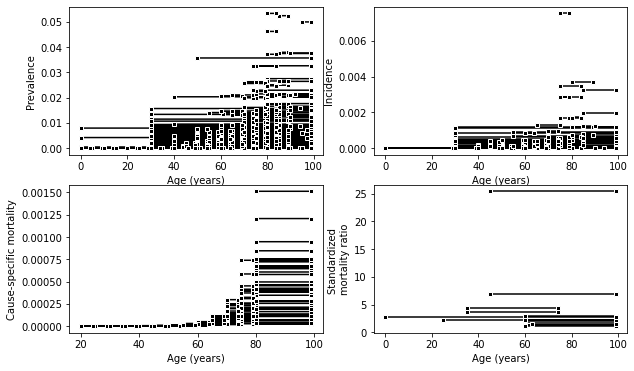

In [22]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1); dismod_mr.plot.data_bars(model.get_data('p')); plt.xlabel('Age (years)'); plt.ylabel('Prevalence')
plt.subplot(2,2,2); dismod_mr.plot.data_bars(model.get_data('i')); plt.xlabel('Age (years)'); plt.ylabel('Incidence')
plt.subplot(2,2,3); dismod_mr.plot.data_bars(model.get_data('csmr')); plt.xlabel('Age (years)'); plt.ylabel('Cause-specific mortality')
plt.subplot(2,2,4); dismod_mr.plot.data_bars(model.get_data('smr')); plt.xlabel('Age (years)'); plt.ylabel('Standardized \nmortality ratio');

In [23]:
model.input_data.columns

Index(['index', 'age_end', 'age_start', 'age_weights', 'area', 'data_type',
       'effective_sample_size', 'lower_ci', 'sex', 'standard_error',
       'upper_ci', 'value', 'x_cv_ascertainment', 'x_cv_diagnostic_criteria',
       'x_cv_representative', 'year_end', 'year_start'],
      dtype='object')

In [24]:
model.vars += dismod_mr.model.consistent(model)
%time dismod_mr.fit.consistent(model)

using stored FE for beta_i_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_i_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_r_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_f_x_cv_di

/opt/anaconda3/envs/dismod_mr/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


using stored FE for beta_X_x_cv_ascertainment x_cv_ascertainment {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_X_x_cv_diagnostic_criteria x_cv_diagnostic_criteria {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_X_x_cv_representative x_cv_representative {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
using stored FE for beta_X_x_sex x_sex {'mu': 0, 'dist': 'Normal', 'sigma': 0.0001}
fitting submodels


/opt/anaconda3/envs/dismod_mr/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
fitting all stochs

finding step covariances
. . . . . . . . . . . . . . . . . . . . . . . . . 
sampling from posterior distribution

Halting at iteration  21  of  2000
CPU times: user 14min 34s, sys: 5min, total: 19min 35s
Wall time: 4min 15s


(<pymc.NormalApproximation.MAP at 0x7fc25acb6390>,
 <pymc.MCMC.MCMC at 0x7fc25acb6208>)

/homes/abie/.conda/envs/dismod_mr/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


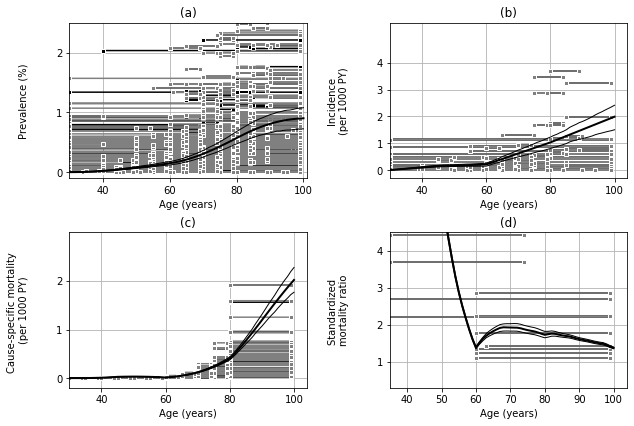

In [25]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1); dismod_mr.plot.data_bars(model.get_data('p')); plt.xlabel('Age (years)'); plt.ylabel('Prevalence')
plt.subplot(2,2,2); dismod_mr.plot.data_bars(model.get_data('i')); plt.xlabel('Age (years)'); plt.ylabel('Incidence')
plt.subplot(2,2,3); dismod_mr.plot.data_bars(model.get_data('csmr')); plt.xlabel('Age (years)'); plt.ylabel('Cause-specific mortality')
plt.subplot(2,2,4); dismod_mr.plot.data_bars(model.get_data('smr')); plt.xlabel('Age (years)'); plt.ylabel('Standardized \nmortality ratio')
param_list = [dict(type='p', title='(a)', ylabel='Prevalence (%)', yticks=([0, .01, .02], [0, 1, 2]), axis=[30,101,-0.001,.025]),
          dict(type='i', title='(b)', ylabel='Incidence \n(per 1000 PY)', yticks=([0, .001,.002, .003, .004], [0, 1, 2, 3, 4]), axis=[30,104,-.0003,.0055]),
          dict(type='pf', title='(c)', ylabel='Cause-specific mortality \n(per 1000 PY)', yticks=([0, .001,.002], [0, 1, 2]), axis=[30,104,-.0002,.003]),
          dict(type='smr', title='(d)', ylabel='Standardized \nmortality ratio', yticks=([1, 2, 3,4, ], [1, 2,3, 4]), axis=[35,104,.3,4.5]),
          ]

for i, params in enumerate(param_list):
    ax = plt.subplot(2,2,i+1)
    if params['type'] == 'pf': dismod_mr.plot.data_bars(model.get_data('csmr'), color='grey')
    else: dismod_mr.plot.data_bars(model.get_data(params['type']), color='grey')
    
    if params['type'] == 'smr': model.pred = dismod_mr.model.predict_for(model, model.parameters.get('smr', {}), 'all', 'female', 2005, 
                                                               'GBR', 'female', 2005, 1., model.vars['smr'], 0., 100.).T
    else : model.pred = dismod_mr.model.predict_for(model, model.parameters[params['type']],
                                                       'all', 'female', 2005, 
                                                       'GBR', 'female', 2005, 1., model.vars[params['type']], 0., 1.).T
    
    plt.plot(np.arange(101), model.pred.mean(axis=1), 'k-', linewidth=2, label='Posterior Mean')
    hpd = mc.utils.hpd(model.pred.T, .05)
    plt.plot(np.arange(101), hpd[0], 'k-', linewidth=1, label='95% HPD interval')
    plt.plot(np.arange(101), hpd[1], 'k-', linewidth=1)

    plt.xlabel('Age (years)')
    plt.ylabel(params['ylabel']+'\n\n', ha='center')
    plt.axis(params.get('axis', [-5,105,-.005,.06]))
    plt.yticks(*params.get('yticks', ([0, .025, .05], [0, 2.5, 5])))
    plt.title(params['title'])
    plt.grid()
    
plt.subplots_adjust(hspace=.35, wspace=.35, top=.97)

In [26]:
p_with = model

The most notable difference between the estimates from this model and from the model
that used prevalence data only is that this model produces estimates of incidence and
mortality in addition to prevalence.  In many cases, the model also produces estimates
of the remission rate as well, but there is no remission of PD, so the estimates of zero
are not very interesting in this example.  It is another place that informative priors are useful,
however.

There are also differences between the means and uncertainty intervals estimated by these methods,
which show that the additional data is important.  Although the prevalence data alone predicts 
age-specific prevalence that peaks at 2%, when the incidence and mortality data is also included, the
maximum prevalence is a bit lower, closer to 1.5%.

In [27]:
p1 = dismod_mr.model.predict_for(p_only, model.parameters['p'],
                                    'all', 'total', 'all', 
                                    'GBR', 'female', 2005, 1.,
                                    p_only.vars['p'], 0., 1.)

p2 = dismod_mr.model.predict_for(p_with, model.parameters['p'],
                                    'all', 'total', 'all', 
                                    'GBR', 'female', 2005, 1.,
                                    p_with.vars['p'], 0., 1.)

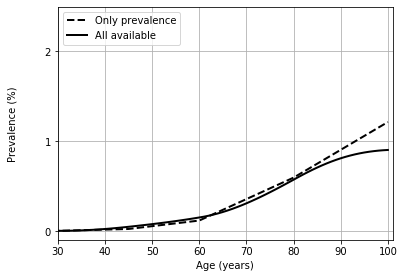

In [28]:
plt.plot(p1.mean(axis=0), 'k--', linewidth=2, label='Only prevalence')
plt.plot(p2.mean(axis=0), 'k-', linewidth=2, label='All available')

plt.xlabel('Age (years)')
plt.ylabel('Prevalence (%)\n\n', ha='center')
plt.yticks([0, .01, .02], [0, 1, 2])
plt.axis([30,101,-0.001,.025])
plt.legend(loc='upper left')
plt.grid()

plt.subplots_adjust(top=.97, bottom=.16)

Because the data is so noisy, the differences between the mean estimates of these different models are not significant; the posterior distributions
have considerable overlap.  At age 80, for example, the posterior distributions for age-80 prevalence are estimated as the following:

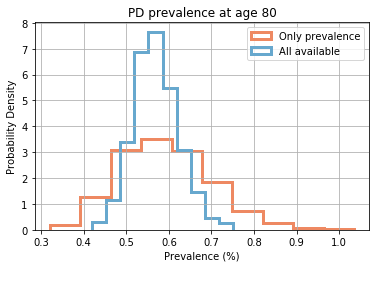

In [29]:
plt.hist(100*p1[:,80], density=True, histtype='step', label='Only prevalence', linewidth=3, color=np.array([239., 138., 98., 256.])/256)
plt.hist(100*p2[:,80], density=True, histtype='step', label='All available', linewidth=3, color=np.array([103, 169, 207, 256.])/256)
plt.title('PD prevalence at age 80')
plt.xlabel('Prevalence (%)\n\n', ha='center')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.grid()

plt.subplots_adjust(bottom=.16)

Conclusion
==========

I hope that this example is a quick way to see the strengths and weaknesses of DisMod-MR.
This model is particularly suited for estimating descriptive epidemiology of diseases
with sparse, noisy data from multiple, incompatible sources.

I am currently working to make it faster, as well as to improve the capabilities for modeling
changes between regions over time.

In [19]:
!date

Tue Apr 29 15:47:18 EDT 2025


In [43]:
!pip list

Package                       Version     Editable project location
----------------------------- ----------- ---------------------------------
anyio                         3.3.2
appnope                       0.1.3
argon2-cffi                   21.1.0
async_generator               1.10
attrs                         22.2.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 2.0.0
bleach                        6.1.0
brotlipy                      0.7.0
certifi                       2021.5.30
cffi                          1.14.6
charset-normalizer            2.1.1
contextvars                   2.4
cryptography                  35.0.0
cycler                        0.11.0
dataclasses                   0.8
decorator                     5.1.1
defusedxml                    0.7.1
dismod-mr                     1.1.2.7     /Users/jeonsang-eon/dismod_mr/src
entrypoints                   0.4
et-xmlfile                    1.1.0
idna                 